# Statistics of filtered RBP peaks
- how many peaks have we lost
- how many peaks per feature (exon, intron)
- how many feature is none-zeor
- how many feature is shared?

In [1]:
in_dir = '/home/hsher/seqdata/eclip_bed/'
extension = '.01v02.IDR.out.0102merged.bed.blacklist_removed.bed.narrowPeak.bed'
out_dir = '/home/hsher/seqdata/canonical_transcript_binding/_correct/'
import pandas as pd
eclip_bam = pd.read_csv('/home/hsher/projects/peak_calling/ENCODE_FINAL_ANNOTATIONS.uidsonly.txt.manifesthg38.txt', sep = '\t', header= 0)

# number of peaks v.s. number of features being 1

In [2]:
from pybedtools import BedTool


In [3]:
eclip_bam.set_index('uID', inplace = True)

In [4]:

no_peaks = []
for fname in eclip_bam.index:
    b1 = BedTool(in_dir+fname+extension)
    eclip_bam.loc[fname, 'no_peaks'] = b1.count()

In [5]:
no_features = []
for fname in eclip_bam.index:
    b1 = BedTool(out_dir+fname)
    eclip_bam.loc[fname, 'no_features'] = b1.count()

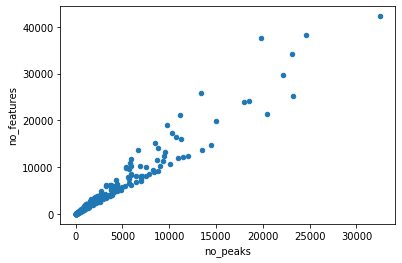

In [6]:
eclip_bam.plot(kind = 'scatter', x = 'no_peaks', y='no_features')

# length of feature vector
609510

# types of feature: intron, exon, 3UTR or 5UTR

In [7]:
import os

for fname in eclip_bam.index:
    x = os.popen('~/project/scripts/count_types_feature.sh {}'.format(out_dir+fname)).read()

In [8]:
new_cols = ['exon', 'intron', '5-UTR', '3-UTR']
for col in new_cols:
    eclip_bam[col] = 0

In [9]:
import subprocess

for fname in eclip_bam.index:
    batcmd='../scripts/count_types_feature.sh {}'.format(out_dir+fname)
    result = subprocess.check_output(batcmd, shell=True)
    eclip_bam.loc[fname, ['exon', 'intron', '5-UTR', '3-UTR']] = [int(i) for i in result.decode("utf-8").rstrip('\n').split(', ')]

In [10]:
def porportion(eclip_bam):
    ''' from number of peaks in intron/exon/UTR to percentage '''
    percent = eclip_bam[['exon', 'intron', '5-UTR', '3-UTR']].div(eclip_bam[['exon', 'intron', '5-UTR', '3-UTR']].sum(axis = 1), axis = 0)
    return(percent)

In [11]:
eclip_bam[['exon', 'intron', '5-UTR', '3-UTR']].sum(axis = 1)

uID
203             3399
204             8157
205             6471
206             6573
209              526
               ...  
762            21119
235x4000        1883
284x4000fix       77
374x4000fix     1889
632x            6071
Length: 223, dtype: int64

In [12]:
percent = porportion(eclip_bam)*100

[Text(0, 0, 'HNRNPC'),
 Text(0, 0, 'RBFOX2'),
 Text(0, 0, 'IGF2BP1'),
 Text(0, 0, 'HNRNPK'),
 Text(0, 0, 'SRSF7'),
 Text(0, 0, 'IGF2BP3'),
 Text(0, 0, 'TIA1'),
 Text(0, 0, 'SRSF9'),
 Text(0, 0, 'TRA2A'),
 Text(0, 0, 'IGF2BP1'),
 Text(0, 0, 'HNRNPM'),
 Text(0, 0, 'FKBP4'),
 Text(0, 0, 'HNRNPM'),
 Text(0, 0, 'IGF2BP2'),
 Text(0, 0, 'SLTM'),
 Text(0, 0, 'SF3B4'),
 Text(0, 0, 'BCCIP'),
 Text(0, 0, 'FMR1'),
 Text(0, 0, 'FXR2'),
 Text(0, 0, 'TRA2A'),
 Text(0, 0, 'DDX42'),
 Text(0, 0, 'U2AF2'),
 Text(0, 0, 'LARP7'),
 Text(0, 0, 'U2AF1'),
 Text(0, 0, 'XRN2'),
 Text(0, 0, 'HNRNPA1'),
 Text(0, 0, 'HNRNPU'),
 Text(0, 0, 'SLTM'),
 Text(0, 0, 'CPSF6'),
 Text(0, 0, 'EIF4G2'),
 Text(0, 0, 'SLBP'),
 Text(0, 0, 'SAFB2'),
 Text(0, 0, 'U2AF2'),
 Text(0, 0, 'CSTF2T'),
 Text(0, 0, 'PRPF8'),
 Text(0, 0, 'FAM120A'),
 Text(0, 0, 'HNRNPU'),
 Text(0, 0, 'U2AF1'),
 Text(0, 0, 'HNRNPA1'),
 Text(0, 0, 'TIA1'),
 Text(0, 0, 'HNRNPUL1'),
 Text(0, 0, 'PRPF8'),
 Text(0, 0, 'CSTF2T'),
 Text(0, 0, 'FAM120A'),
 Text(0, 0,

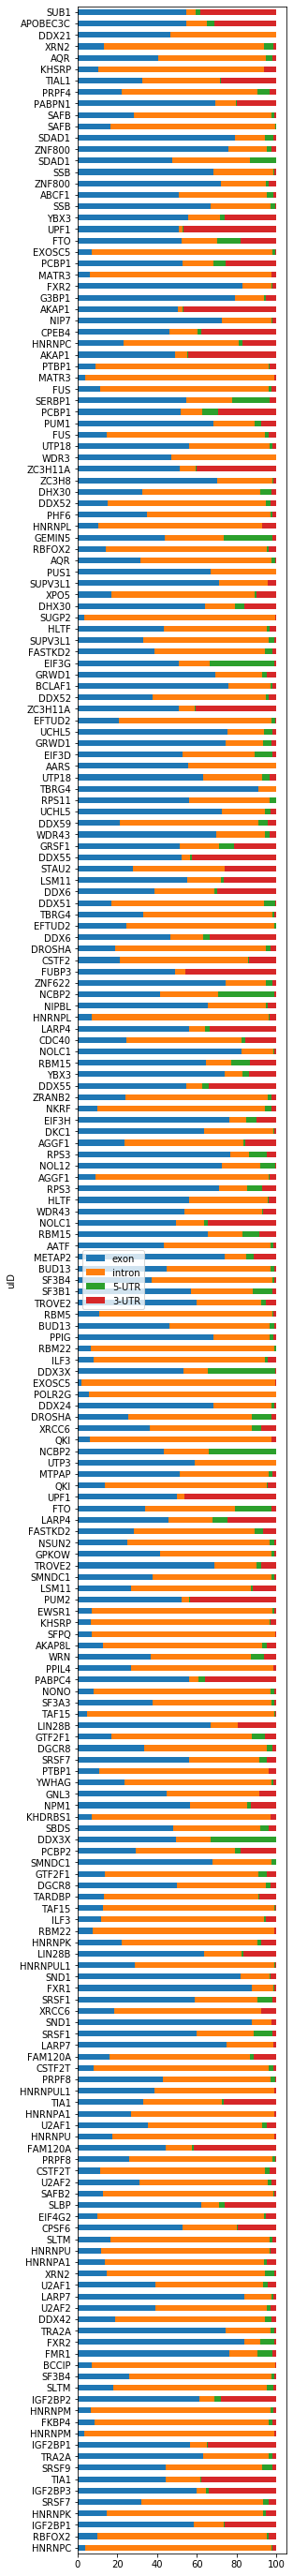

In [13]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
percent.plot.barh(stacked = True, figsize = (4,50), ax = ax)
ax.set_yticklabels(eclip_bam['RBP'])

# encode paper RBP --> compare !!!!


# type binding per transcript

In [73]:
# extract transcript id for each
import os
for fname in eclip_bam.index:
    os.system('../scripts/get_transcript_id.sh {}'.format(out_dir+fname))

In [15]:
all_transcript = pd.read_csv('~/projects/knownCanonical.txt', sep = '\t', header = None)

In [16]:
all_transcript = all_transcript[4]

In [17]:
len(all_transcript)

66622

In [18]:
three_utr = pd.DataFrame(columns = all_transcript, index = eclip_bam.index)
for fname in eclip_bam.index:
    with open(out_dir + fname + '_3utr.esnt') as f:
        ids = f.readlines()
        ids = [i.rstrip('\n') for i in ids]
        three_utr.loc[fname, ids] = 1


In [19]:
three_utr.fillna(0, inplace = True)

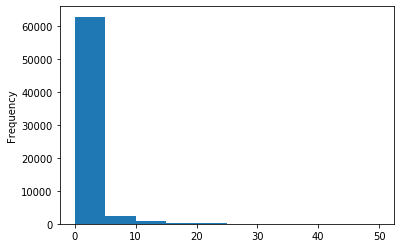

In [20]:
three_utr.sum(axis = 0).plot.hist()

In [21]:
three_utr = three_utr.loc[:, three_utr.sum(axis = 0)> 0] # select only transcript with 3'utr binding

Text(0.5, 1.0, "number of RBP in 3'UTR per transcript")

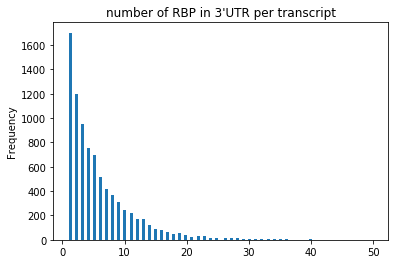

In [22]:
three_utr.sum(axis = 0).plot.hist(bins = 100)
plt.title('number of RBP in 3\'UTR per transcript')

#### more RBP binding, more regulation?
- functinal RBP --> see in knockdown
- many peaks per RBP 00> might be more sensitive 

Text(0.5, 1.0, "number of transcript in 3'UTR per RBP")

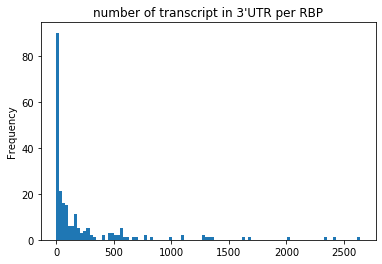

In [23]:
three_utr.sum(axis = 1).plot.hist(bins = 100)
plt.title('number of transcript in 3\'UTR per RBP')

In [24]:
# infidel rbp
eclip_bam.loc[three_utr.loc[three_utr.sum(axis = 1)>500, :].index]['RBP'].unique()

array(['IGF2BP1', 'IGF2BP3', 'TIA1', 'IGF2BP2', 'FAM120A', 'LIN28B',
       'PCBP2', 'PABPC4', 'PUM2', 'UPF1', 'RBM15', 'NOLC1', 'YBX3',
       'LARP4', 'FUBP3', 'DDX6', 'LSM11', 'DDX55', 'GRWD1', 'ZC3H11A',
       'BCLAF1', 'AKAP1', 'PABPN1', 'TIAL1', 'SUB1'], dtype=object)

### RBP rely on miRNA -> special case

In [25]:
eclip_bam.loc[three_utr.loc[three_utr.sum(axis = 1)<10, :].index]['RBP'].unique()

array(['BCCIP', 'DDX42', 'LARP7', 'HNRNPU', 'HNRNPA1', 'HNRNPUL1',
       'XRCC6', 'RBM22', 'TAF15', 'SMNDC1', 'SBDS', 'NPM1', 'GNL3',
       'YWHAG', 'PPIL4', 'WRN', 'SFPQ', 'NSUN2', 'UTP3', 'POLR2G',
       'SF3B1', 'NOL12', 'ZRANB2', 'NOLC1', 'NCBP2', 'TBRG4', 'DDX51',
       'WDR43', 'RPS11', 'UTP18', 'AARS', 'DDX52', 'EIF3G', 'SUPV3L1',
       'DHX30', 'PUS1', 'ZC3H8', 'WDR3', 'SERBP1', 'NIP7', 'EXOSC5',
       'SSB', 'ABCF1', 'SDAD1', 'SAFB', 'DDX21'], dtype=object)

## 5' UTR

In [26]:
five_utr = pd.DataFrame(columns = all_transcript, index = eclip_bam.index)
for fname in eclip_bam.index:
    with open(out_dir + fname + '_5utr.esnt') as f:
        ids = f.readlines()
        ids = [i.rstrip('\n') for i in ids]
        five_utr.loc[fname, ids] = 1
five_utr.fillna(0, inplace = True)

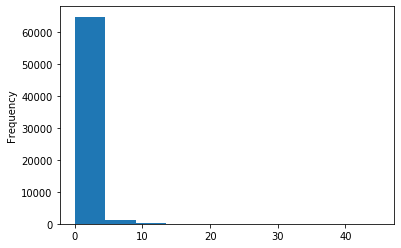

In [27]:
five_utr.sum(axis = 0).plot.hist()

In [28]:
five_utr = five_utr.loc[:, five_utr.sum(axis = 0)> 0] # select only transcript with 3'utr binding

Text(0.5, 1.0, "number of RBP in 5'UTR per transcript")

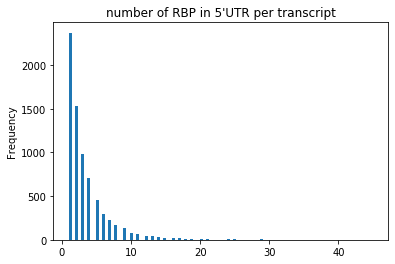

In [29]:
five_utr.sum(axis = 0).plot.hist(bins = 100)
plt.title('number of RBP in 5\'UTR per transcript')

Text(0.5, 1.0, "number of transcript in 5'UTR per RBP")

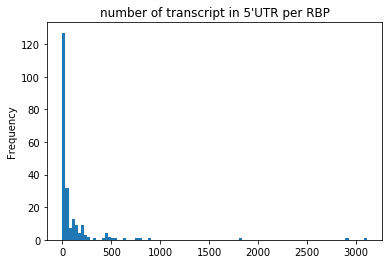

In [30]:
five_utr.sum(axis = 1).plot.hist(bins = 100)
plt.title('number of transcript in 5\'UTR per RBP')

In [31]:
eclip_bam.loc[five_utr.loc[five_utr.sum(axis = 1)>1000, :].index]['RBP'].unique()

array(['DDX3X', 'NCBP2'], dtype=object)

In [32]:
three_utr = three_utr.loc[three_utr.sum(axis = 1)>0]
five_utr = five_utr.loc[five_utr.sum(axis = 1)>0]

In [33]:
three_utr.to_pickle('~/projects/three_utr.pickle')
five_utr.to_pickle('~/projects/five_utr.pickle')

# Intron and Exon

In [34]:
# process transcript type
import os
for fname in eclip_bam.index:
    os.system('../scripts/transcript_type.sh {}'.format(out_dir+fname))

In [35]:
# parse output
exon_counts = []
transcript_counts = []
for fname in eclip_bam.index:
    with open(out_dir+fname+'_transcript_type') as f:
        output = f.read().splitlines()
        exon_start = output.index('exon')
        
        transcript_dict = dict(zip([i.split()[1].replace('gene_type=', '')  for i in output[1:exon_start]],
                              [int(i.split()[0])  for i in output[1:exon_start]]))
        exon_dict = dict(zip([i.split()[1].replace('gene_type=', '')  for i in output[exon_start+1:]],
                              [int(i.split()[0])  for i in output[exon_start+1:]]))
        
        exon_counts.append(exon_dict)
        transcript_counts.append(transcript_dict)
        
        
        

In [36]:
transcript_counts = pd.DataFrame(transcript_counts, index = eclip_bam.index).fillna(0)
exon_counts = pd.DataFrame(exon_counts, index = eclip_bam.index).fillna(0)

Text(0.5, 1.0, 'Number of features in each transcript type')

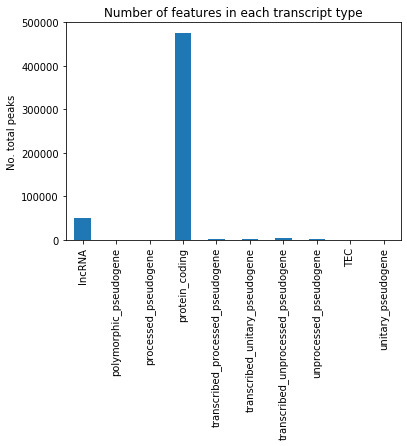

In [37]:
transcript_counts.sum(axis = 0).plot(kind = 'bar')
plt.ylabel('No. total peaks')
plt.title('Number of features in each transcript type')

Text(0.5, 1.0, 'Number of features in each exon type')

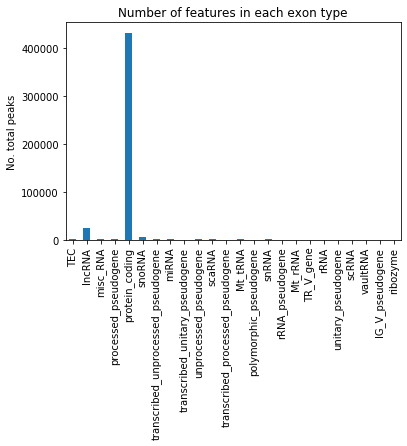

In [38]:
exon_counts.sum(axis = 0).plot(kind = 'bar')
plt.ylabel('No. total peaks')
plt.title('Number of features in each exon type')

# looking only at introns

Text(0.5, 1.0, 'Number of transcripts per RBP')

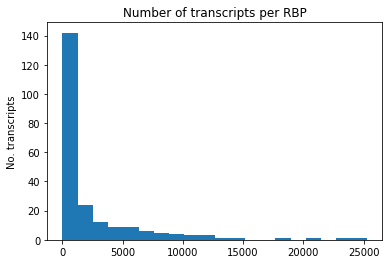

In [39]:
transcript_counts.sum(axis = 1).plot(kind = 'hist', bins = 20)
plt.ylabel('No. transcripts')
plt.title('Number of transcripts per RBP')

In [40]:
transcript_counts

,lncRNA,polymorphic_pseudogene,processed_pseudogene,protein_coding,transcribed_processed_pseudogene,transcribed_unitary_pseudogene,transcribed_unprocessed_pseudogene,unprocessed_pseudogene,TEC,unitary_pseudogene
uID,,,,,,,,,,
203,245,1.0,2.0,2896.0,2.0,5.0,25.0,7.0,0.0,0.0
204,406,4.0,0.0,6464.0,16.0,1.0,24.0,6.0,0.0,0.0
205,97,0.0,0.0,844.0,2.0,0.0,16.0,0.0,0.0,0.0
206,464,0.0,1.0,4639.0,5.0,5.0,36.0,8.0,0.0,0.0
209,30,0.0,0.0,291.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
762,604,10.0,0.0,10809.0,4.0,6.0,50.0,11.0,0.0,0.0
235x4000,136,0.0,0.0,1371.0,5.0,1.0,8.0,1.0,0.0,0.0
284x4000fix,18,0.0,0.0,22.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
eclip_bam.loc[transcript_counts.loc[transcript_counts.sum(axis = 1)>15000, :].index]['RBP'].unique()

# pre-mRNA processing factor; 
# Cleavage Stimulation Factor Subunit 2 Tau Variant;
# AQR (Aquarius Intron-Binding Spliceosomal Factor) 

array(['PRPF8', 'CSTF2T', 'KHSRP', 'AQR'], dtype=object)

Text(0.5, 1.0, 'Number of protein_coding intron per RBP')

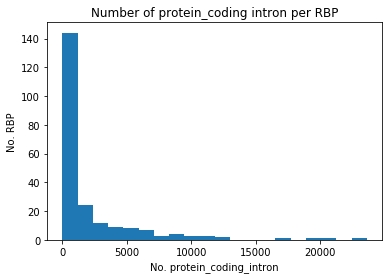

In [42]:
transcript_counts['protein_coding'].plot(kind = 'hist', bins = 20)
plt.ylabel('No. RBP')
plt.xlabel('No. protein_coding_intron')
plt.title('Number of protein_coding intron per RBP')

In [43]:
eclip_bam.loc[transcript_counts.loc[transcript_counts['protein_coding']>15000, :].index]['RBP'].unique()


array(['PRPF8', 'CSTF2T', 'KHSRP', 'AQR'], dtype=object)

Text(0.5, 1.0, 'Number of lncRNA intron per RBP')

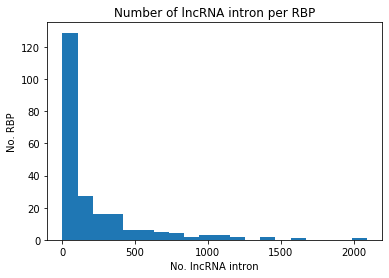

In [44]:
transcript_counts['lncRNA'].plot(kind = 'hist', bins = 20)
plt.ylabel('No. RBP')
plt.xlabel('No. lncRNA intron')
plt.title('Number of lncRNA intron per RBP')

In [45]:
eclip_bam.loc[transcript_counts.loc[transcript_counts['lncRNA']>1000, :].index]['RBP'].unique()
# arginine/serine-rich family of splicing factors

array(['SAFB2', 'CSTF2T', 'PTBP1', 'KHSRP', 'EXOSC5', 'AGGF1', 'HNRNPL',
       'SUGP2', 'AQR'], dtype=object)

Text(0.5, 1.0, 'do protein coding gene and lncRNA has the same RBPs binding in their intron?')

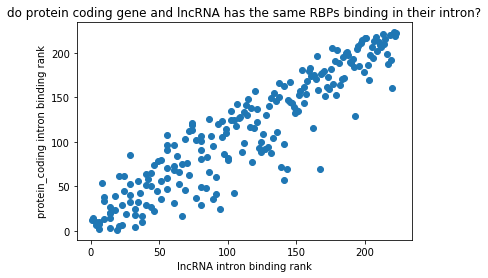

In [46]:
plt.scatter(x = transcript_counts['lncRNA'].rank(), y = transcript_counts['protein_coding'].rank())
plt.xlabel('lncRNA intron binding rank')
plt.ylabel('protein_coding intron binding rank')
plt.title('do protein coding gene and lncRNA has the same RBPs binding in their intron?')

Text(0.5, 1.0, 'No. pseudogene intron per RBP')

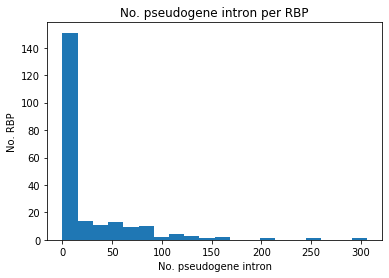

In [47]:
pseudogene_intron_count = transcript_counts.loc[:, transcript_counts.columns.str.contains('pseudogene')].sum(axis = 1)
pseudogene_intron_count.plot.hist(bins = 20)
plt.xlabel('No. pseudogene intron')
plt.ylabel('No. RBP')
plt.title('No. pseudogene intron per RBP')

In [48]:
eclip_bam.loc[transcript_counts.loc[pseudogene_intron_count>150, :].index]['RBP'].unique()
# arginine/serine-rich family of splicing factors
# Exosome Component 5
# Peptidylprolyl Isomerase G

array(['SAFB2', 'KHSRP', 'EXOSC5', 'PPIG', 'AQR'], dtype=object)

In [49]:
pse = eclip_bam.loc[pseudogene_intron_count[pseudogene_intron_count.rank(ascending = False)<10].index, 'RBP']
lnc = eclip_bam.loc[transcript_counts.loc[transcript_counts['lncRNA'].rank(ascending = False)<10].index, 'RBP']
coding = eclip_bam.loc[transcript_counts.loc[transcript_counts['protein_coding'].rank(ascending = False)<10].index, 'RBP']

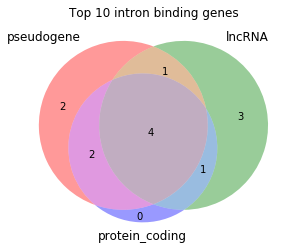

In [50]:
from matplotlib_venn import venn3, venn3_circles
plt.title('Top 10 intron binding genes')
venn3([set(pse), set(lnc), set(coding)], set_labels = ('pseudogene', 'lncRNA', 'protein_coding'))

In [51]:
pse = eclip_bam.loc[pseudogene_intron_count[pseudogene_intron_count.rank(ascending = False)<50].index, 'RBP']
lnc = eclip_bam.loc[transcript_counts.loc[transcript_counts['lncRNA'].rank(ascending = False)<50].index, 'RBP']
coding = eclip_bam.loc[transcript_counts.loc[transcript_counts['protein_coding'].rank(ascending = False)<50].index, 'RBP']

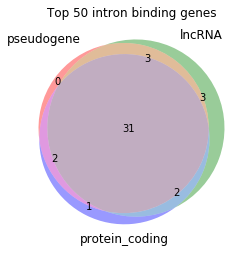

In [52]:
from matplotlib_venn import venn3, venn3_circles
plt.title('Top 50 intron binding genes')
venn3([set(pse), set(lnc), set(coding)], set_labels = ('pseudogene', 'lncRNA', 'protein_coding'))

# looking at exons

Text(0.5, 1.0, 'do protein coding gene and lncRNA has the same RBPs binding in their exon?')

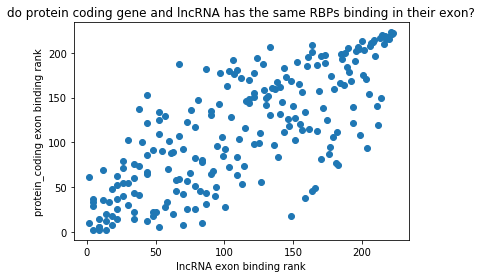

In [53]:
plt.scatter(x = exon_counts['lncRNA'].rank(), y = exon_counts['protein_coding'].rank())
plt.xlabel('lncRNA exon binding rank')
plt.ylabel('protein_coding exon binding rank')
plt.title('do protein coding gene and lncRNA has the same RBPs binding in their exon?')

In [54]:
pseudogene_exon_count = exon_counts.loc[:, exon_counts.columns.str.contains('pseudogene')].sum(axis = 1)

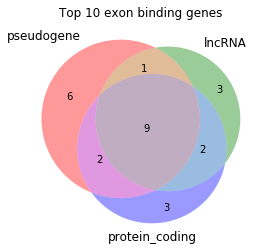

In [55]:
pse = eclip_bam.loc[pseudogene_exon_count[pseudogene_exon_count.rank(ascending = False)<20].index, 'RBP']
lnc = eclip_bam.loc[exon_counts.loc[exon_counts['lncRNA'].rank(ascending = False)<20].index, 'RBP']
coding = eclip_bam.loc[exon_counts.loc[exon_counts['protein_coding'].rank(ascending = False)<20].index, 'RBP']
plt.title('Top 10 exon binding genes')
venn3([set(pse), set(lnc), set(coding)], set_labels = ('pseudogene', 'lncRNA', 'protein_coding'))

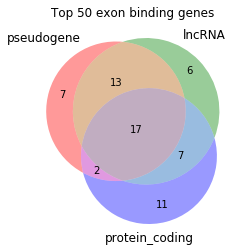

In [56]:
pse = eclip_bam.loc[pseudogene_exon_count[pseudogene_exon_count.rank(ascending = False)<50].index, 'RBP']
lnc = eclip_bam.loc[exon_counts.loc[exon_counts['lncRNA'].rank(ascending = False)<50].index, 'RBP']
coding = eclip_bam.loc[exon_counts.loc[exon_counts['protein_coding'].rank(ascending = False)<50].index, 'RBP']
plt.title('Top 50 exon binding genes')
venn3([set(pse), set(lnc), set(coding)], set_labels = ('pseudogene', 'lncRNA', 'protein_coding'))

In [57]:
pseudogene_intron_count = transcript_counts.loc[:, transcript_counts.columns.str.contains('pseudogene')].sum(axis = 1)

# filter for protein_coding genes only

exon = pd.DataFrame(columns = all_transcript, index = eclip_bam.index)
for fname in eclip_bam.index:
    with open(out_dir + fname + '_exon_cds.esnt') as f:
        ids = f.readlines()
        ids = [i.rstrip('\n') for i in ids]
        exon.loc[fname, ids] = 1


exon.fillna(0, inplace = True)
exon = exon.loc[exon.sum(axis = 1)> 0, exon.sum(axis = 0)> 0] 

exon.to_pickle('~/projects/exon.pickle')

intron = pd.DataFrame(columns = all_transcript, index = eclip_bam.index)
for fname in eclip_bam.index:
    with open(out_dir + fname + '_intron_cds.esnt') as f:
        ids = f.readlines()
        ids = [i.rstrip('\n') for i in ids]
        intron.loc[fname, ids] = 1
intron.fillna(0, inplace = True)
intron = intron.loc[intron.sum(axis = 1)> 0, intron.sum(axis = 0)> 0] 
intron.to_pickle('~/projects/intron.pickle')